In [2]:
import networkx as nx
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas import Series, DataFrame

%matplotlib inline

import os

In [3]:
#Load Pickles
review1_df = pd.read_pickle('./review1_df.pkl')
business_df = pd.read_pickle('./business_df.pkl')

In [4]:
business_df = business_df[business_df['categories'].str.contains('Restaurants|Food',na=False)]

In [8]:
cities={}
for city in business_df.iloc[:].city:
    if city not in cities.keys():
        cities[city] = 1
    else:
        cities[city] += 1

In [11]:
sorted(cities.items(),key=lambda x: x[1], reverse=True)[:10]

[('Toronto', 9677),
 ('Las Vegas', 7976),
 ('Phoenix', 4998),
 ('MontrÃ©al', 4256),
 ('Calgary', 3565),
 ('Charlotte', 3356),
 ('Pittsburgh', 3011),
 ('Scottsdale', 1957),
 ('Cleveland', 1775),
 ('Mississauga', 1678)]

In [10]:
review1_df[1:2]

,business_id,cool,date,funny,review_id,stars,text,useful,user_id
1,pomGBqfbxcqPv14c3XH-ZQ,0,2012-11-13,0,dDl8zu1vWPdKGihJrwQbpw,5,I love this place! My fiance And I go here atl...,0,msQe1u7Z_XuqjGoqhB0J5g


In [4]:
G = nx.Graph()

In [5]:
for biz in set(review1_df['business_id']):
    G.add_node('biz_' + biz)
    G.nodes['biz_' + biz]['class'] = 'business'
for usr in set(review1_df['user_id']):
    G.add_node('user_' + usr)
    G.nodes['user_' + usr]['class'] = 'user'

In [6]:
for biz, usr in zip(review1_df['business_id'],review1_df['user_id']):
    G.add_edge('biz_' + biz,'user_' + usr)
    #G.nodes[biz]['class'] = 'business'
    #G.nodes[usr]['class'] = 'user'

In [22]:
from fa2 import ForceAtlas2

In [23]:
forceatlas2 = ForceAtlas2(scalingRatio=0.01,
                          strongGravityMode=False,
                          gravity=10)

positions = forceatlas2.forceatlas2_networkx_layout(G, pos=None, iterations=500)

  0%|          | 0/500 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [8]:
def maps(G):
    color_map = []
    size_map = []
    for n in list(G.nodes):
        if G.nodes[n]['class'] == 'business': #Blue is business
            color_map.append("#0000ff")
        elif G.nodes[n]['class'] == 'user': #Red is user
            color_map.append("#ff0000")
        else:
            color_map.append("#00ff00")
        size_map.append(G.degree(n))
    return (color_map, size_map)

In [40]:
network = [n for n in sub.nodes if sub.nodes[n]['class']=='business']

In [54]:
business_df[business_df['business_id'] == network[0][4:]]

,address,attributes,business_id,categories,city,hours,is_open,latitude,longitude,name,neighborhood,postal_code,review_count,stars,state
42983,17070 Pearl Rd,"{'Alcohol': 'full_bar', 'Ambience': '{'romanti...",2ALi7ZYvil-BAXFa3CMUyA,"Steakhouses, Sushi Bars, Japanese, Restaurants",Strongsville,"{'Monday': '11:0-22:0', 'Tuesday': '11:0-22:0'...",1,41.293935,-81.835899,Shinto Japanese Steakhouse & Sushi Bar,,44136,162,3.5,OH


Text(0.5,0,'# Reviews given/received')

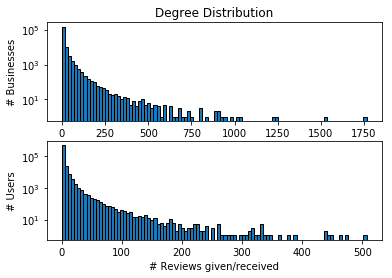

In [11]:
#Plot review distribution
plt.subplot(211)
plt.title('Degree Distribution')
plt.hist([G.degree(n) for n in G.nodes if G.nodes[n]['class'] == 'business'],bins=100,log=True,edgecolor='black')
plt.ylabel('# Businesses')

plt.subplot(212)
plt.hist([G.degree(n) for n in G.nodes if G.nodes[n]['class'] == 'user'],bins=100,log=True,edgecolor='black')
plt.ylabel('# Users')
plt.xlabel('# Reviews given/received')

C:\Users\Ronan Perry\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


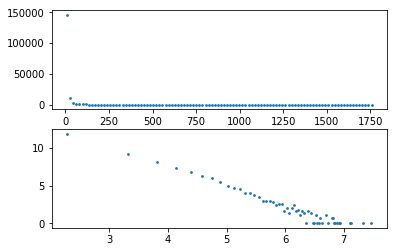

In [12]:
hist, bin_edges = np.histogram([G.degree(n) for n in G.nodes if G.nodes[n]['class'] == 'business'], bins=100)
middle_edges = [(bin_edges[i] + bin_edges[i-1])/2 for i in range(1,len(bin_edges))]
plt.subplot(2,1,1)
plt.scatter(middle_edges, hist, s=3)
plt.subplot(2,1,2)
plt.scatter(np.log(middle_edges), np.log(hist),s=3)

In [80]:
import collections

In [113]:
counter_usr=collections.Counter([G.degree(n) for n in G.nodes if G.nodes[n]['class'] == 'user'])

In [12]:
max_usr = max([n for n in G.nodes if G.nodes[n]['class'] == 'user'],key=lambda x: G.degree(x))

In [13]:
G.degree(max_usr)

507

In [116]:
review1_df[review1_df['user_id'] == max_usr]['text'].tolist()[0]

"The place is huge! It looks like an Indian castle from far and is like a beautiful mansion when you walk into the lobby.  The ceilings are huge and full for classic beautiful chandeliers giving it a magnificent look.\n\nAs soon as you walk into a lobby you notice a big fish tank and then you realizes the lobby has beautiful marble floors and the stair case is beautifully round on each side.\n\nTheir chair selection wasn't nice as you can't sit long term on it and your back starts hurting but I have noticed those chairs in quite a feel other venues. The chairs look nice but are uncomfortable to sit on.\n\nThe Food was where they place lost a star as it was average and wasn't the best. I had multiple dishes as the weddings were buffet style food and some were good (not great) and some were just fillers. \n\nThe staff was nice in giving out drinks and cleaning the table. \n\nThe washroom were clean and designed nicely."

In [122]:
max_biz = max([n for n in G.nodes if G.nodes[n]['class'] == 'business'],key=lambda x: G.degree(x))

In [125]:
G.degree(max_biz)

1765

In [124]:
business_df[business_df['business_id'] == max_biz]

,address,attributes,business_id,categories,city,hours,is_open,latitude,longitude,name,neighborhood,postal_code,review_count,stars,state
137635,3655 Las Vegas Blvd S,"{'Alcohol': 'full_bar', 'Ambience': '{'romanti...",4JNXUYY8wbaaDmk3BPzlWw,"Steakhouses, Breakfast & Brunch, Restaurants, ...",Las Vegas,"{'Monday': '7:0-23:0', 'Tuesday': '7:0-23:0', ...",1,36.112827,-115.172581,Mon Ami Gabi,The Strip,89109,7968,4.0,NV


In [87]:
#Plot average rating distribution
for n in G.nodes:
    G.nodes[n]['avg_stars'] = []
    
for biz, usr,stars in zip(review1_df['business_id'],review1_df['review_id']review1_df['star']):
    G.nodes[biz]['avg_stars'].append('business'
    G.nodes[usr]['avg_stars'] = 'user'

    cls = None
    if G.nodes[n]['class'] == 'user':
        cls = 'user_id'
    elif G.nodes[n]['class'] == 'business':
        cls = 'business_id'
    else:
        print(G.nodes[n])
        break
    G.nodes[n]['avg_stars'] = np.mean(review1_df[review1_df[cls] == n]['stars'])

KeyboardInterrupt: 

In [ ]:
#Plot review distribution
plt.subplot(211)
plt.title('Degree Distribution')
plt.hist([G.nodes[n]['avg_stars'] for n in G.nodes if G.nodes[n]['class'] == 'business'])
plt.ylabel('Business count')

plt.subplot(212)
plt.hist([G.nodes[n]['avg_stars'] for n in G.nodes if G.nodes[n]['class'] == 'user'])
plt.ylabel('User count')
plt.xlabel('Avg stars received/given')

In [126]:
len(G.edges)

1499249

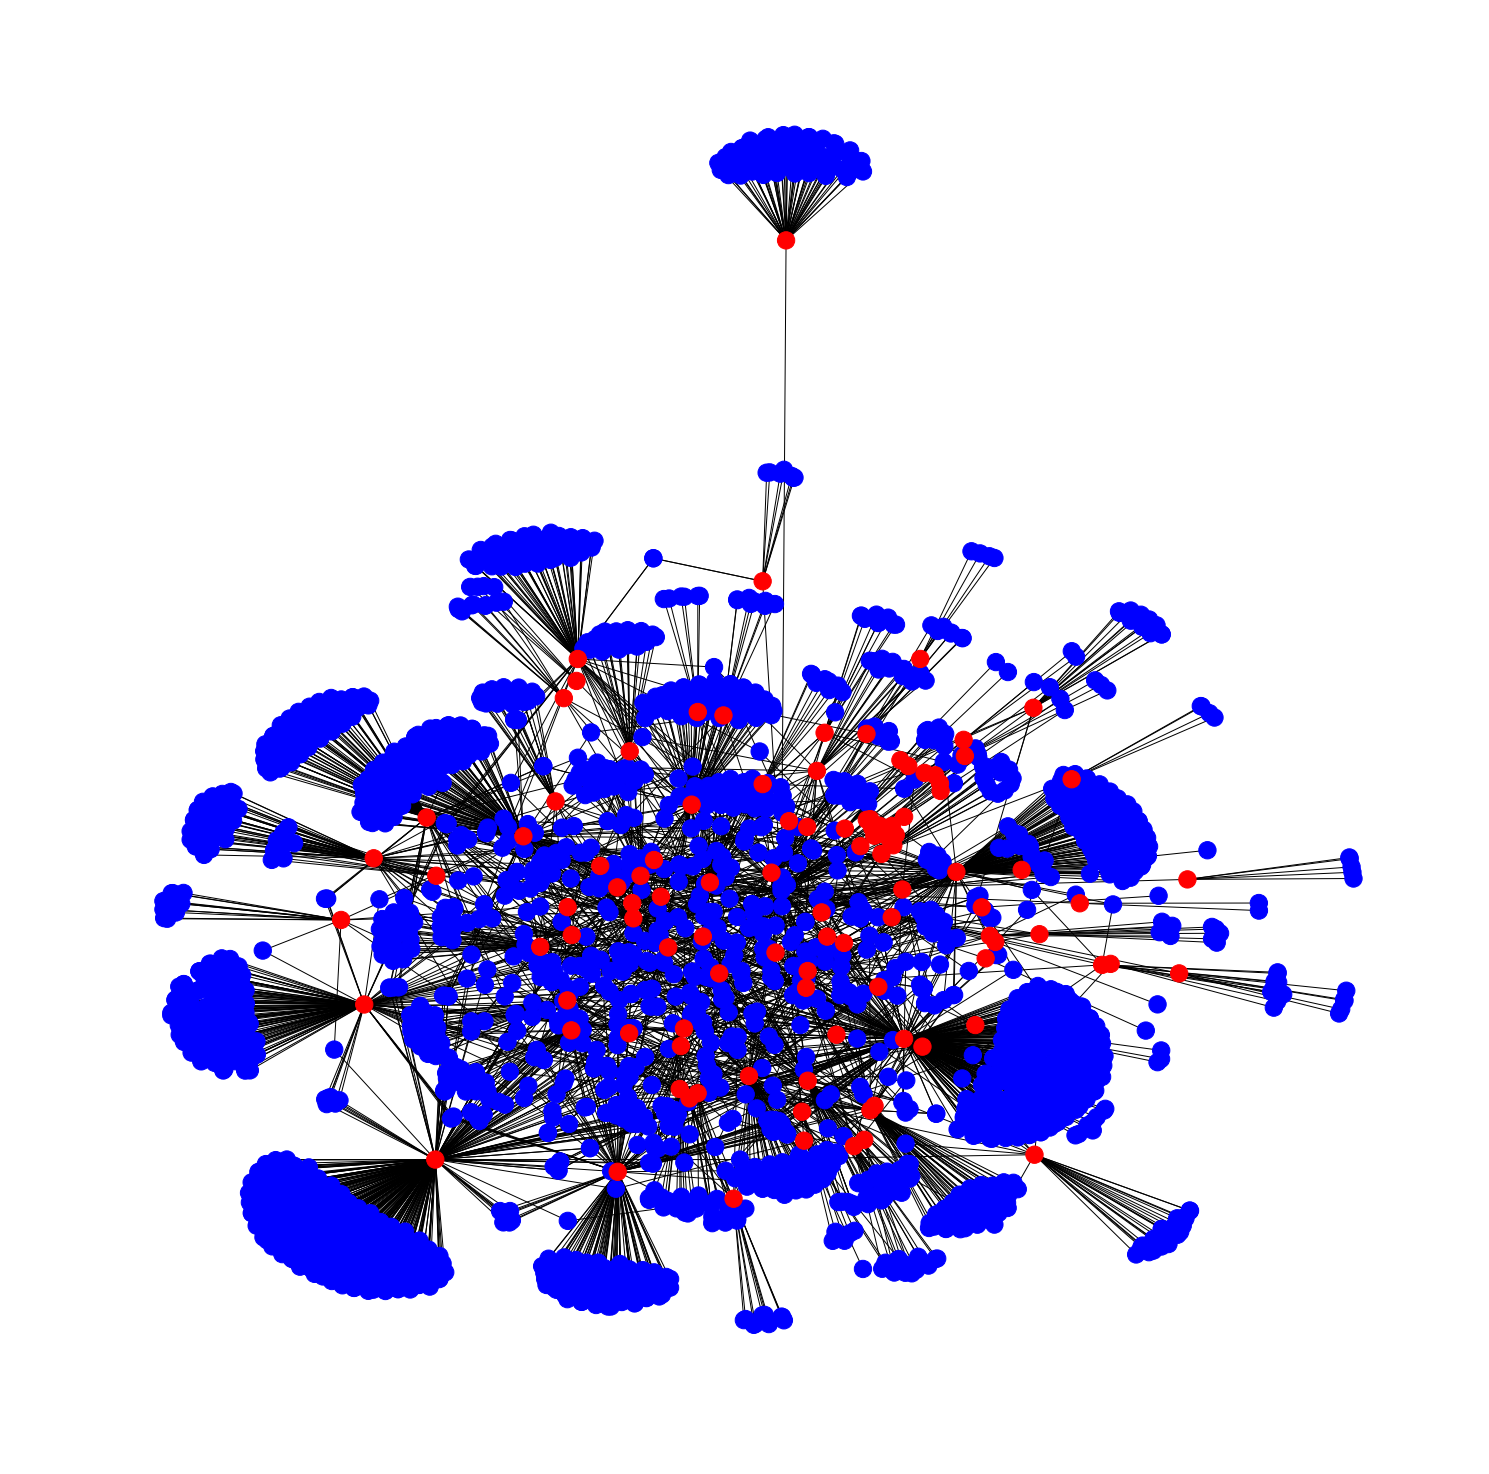

In [82]:
plt.figure(figsize=(20,20))
rnd = np.random.choice([g for g in G.nodes if G.nodes[g]['class']=='user'])
sub = nx.ego_graph(G,rnd,radius=3)
(color_map, size_map) = maps(sub)
nx.draw_spring(sub, arrows=False,node_color=color_map)

In [62]:
import os
os.environ['PROJ_LIB'] = r'C:\Users\Ronan Perry\Anaconda3\pkgs\proj4-5.1.0-hfa6e2cd_1\Library\share'

In [63]:
from mpl_toolkits.basemap import Basemap

In [92]:
lats,lons,names,sizes = [],[],[],[]
for biz in [n for n in sub.nodes if sub.nodes[n]['class']=='business']:
    lookup = business_df[business_df['business_id'] == biz[4:]]
    names.append(lookup['name'])
    lons.append(float(lookup['longitude']))
    lats.append(float(lookup['latitude']))
    sizes.append(nx.shortest_path_length(sub,rnd[5:],biz[4:]))

NodeNotFound: Source gLftKHyId3MoO6whyoGEvg not in G

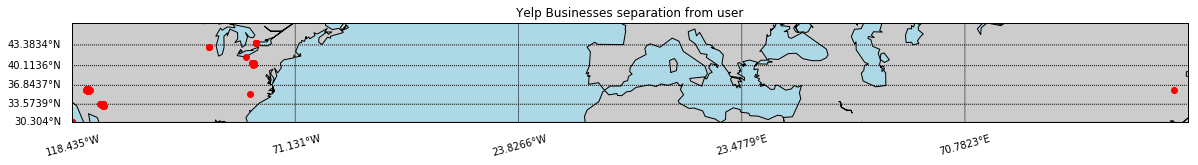

In [88]:
# How much to zoom from coordinates (in degrees)
zoom_scale = 3

# Setup the bounding box for the zoom and bounds of the map
bbox = [np.min(lats)-zoom_scale,np.max(lats)+zoom_scale,\
        np.min(lons)-zoom_scale,np.max(lons)+zoom_scale]

plt.figure(figsize=(20,20))
plt.title("Yelp Businesses separation from user")
# Define the projection, scale, the corners of the map, and the resolution.
m = Basemap(projection='merc',llcrnrlat=bbox[0],urcrnrlat=bbox[1],\
            llcrnrlon=bbox[2],urcrnrlon=bbox[3],lat_ts=10)

# Draw coastlines and fill continents and water with color
m.drawcoastlines()
m.fillcontinents(color='#CCCCCC',lake_color='lightblue')

# draw parallels, meridians, and color boundaries
m.drawparallels(np.arange(bbox[0],bbox[1],(bbox[1]-bbox[0])/5),labels=[1,0,0,0])
m.drawmeridians(np.arange(bbox[2],bbox[3],(bbox[3]-bbox[2])/5),labels=[0,0,0,1],rotation=15)
m.drawmapboundary(fill_color='lightblue')

# plot elevations with different colors using the numpy interpolation mapping tool
# the range [50,200] can be changed to create different colors and ranges
for ii in range(0,len(names)):
    x,y = m(lons[ii],lats[ii])
    plt.plot(x,y,3,marker='o',color='red')

In [60]:
def get_year_reviews(yr):
    yrs = {b:set() for b in business_df['business_id']}
    for biz,dt in zip(review1_df['business_id'], review1_df['date']):
        yrs[biz].add(dt.year)
    def open_in(yrs,yr):
        return yr in yrs and yr-1 in yrs and yr+1 in yrs
    in_yr = [b for b,y in yrs.items() if open_in(y,yr)]
    return in_yr

In [63]:
bizs = get_year_reviews(2017)

In [86]:
over_5 = list([b for b,n in zip(business_df['business_id'], business_df['review_count']) if n >10])
len(over_5)

83619

(array([53015., 24106.,  8870., 13561.,  5422.,  8932.,  7112.,  3014.,
         5334.,  4429.]),
 array([ 3. ,  4.6,  6.2,  7.8,  9.4, 11. , 12.6, 14.2, 15.8, 17.4, 19. ]),
 <a list of 10 Patch objects>)

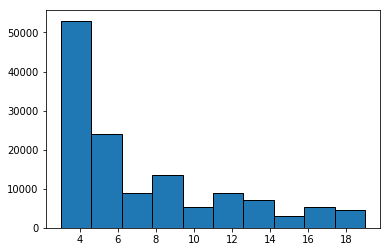

In [83]:
plt.hist([b for b in business_df['review_count'] if b < 20],log=False,edgecolor='black')

In [65]:
Gbiz = nx.Graph()
Gbiz.add_nodes_from(bizs)

In [34]:
for x,y in zip(list(business_df['name']),list(business_df['categories'])):
    if not ('Restaurants' in y or 'Food' in y):
        print(x)

Geico Insurance
Action Engine
Maggie & Stella's Gifts
North Haven Barber Shop
Citi Trends
Nevada Title And Payday Loans
Park Stone Pavers
ADT Security Services, Inc.
Laurier Optical
Schonheit Gardens
Pamper Me Perfect Beauty & Wellness
Wellsprings of Gilbert
Audio Express
Art Bathe
Super 8 by Wyndham Toronto East ON
Cinthya's Beauty Salon
Aria Remodeling
GoodLife Fitness
E R Automotive
Not Just Antiques Mart
Legislative Assembly of Ontario
JAM Scooter Rental Of Las Vegas
Jia Jia International Moving
Brett's Plumbing
Crossfit Revitalize
Shower Solutions
Baby Bundle 3d/4d Ultrasound
Red Crowns Pub
KD Nails
Family Dentistry at CIC
Chevron Pitstop
Gold Pawn Brokers
Philip Pelusi
FedEx Office Print & Ship Center
Royal Conservatory of Music
On The Path Yard Care
Central Church - Henderson
Sunset Castle
Blondie & Co Salon
Mattress Firm South Euclid
Marshalls
Walgreens
Lauren Byrne, MD
Fit Life 120
Mattress Firm Carefree
Makeupbygaby1974
Above and Beyond Dog Grooming
Vegas Vapolife
Long Animal

TypeError: argument of type 'NoneType' is not iterable

In [58]:
review1_df['date'][0].year

2013